In [2]:
import pandas as pd
from collections import Counter
import numpy as np
import os

In [5]:
DDF = []

for i in range(2,21):
    filename = f'NODROP/0MS_LATENCY/benchmark_{i}c_nodrop.csv'
    df = pd.read_csv(filename)
    DDF.append(df)
    
for i in range(30, 101, 10):
    filename = f'NODROP/0MS_LATENCY/benchmark_{i}c_nodrop.csv'
    df = pd.read_csv(filename)
    DDF.append(df)

In [6]:
TIMES = []

for i, df in enumerate(DDF):

    
    Round0Comp = df['Round0Comp'].mean()
    Round1Comp = df['Round1Comp'].mean()
    Round2Comp = df['Round2Comp'].mean()
    Round3Comp = df['Round3Comp'].mean()

    Round0Comm = df['Round0Comm'].mean()
    Round1Comm = df['Round1Comm'].mean()
    Round2Comm = df['Round2Comm'].mean()
    Round3Comm = df['Round3Comm'].mean()
    
    TotalComm = Round1Comm + Round2Comm + Round3Comm
    TotalComp = Round1Comp + Round2Comp + Round3Comp
    TOTAL = TotalComm + TotalComp
    
    print('Communication: ', TotalComm)
    print('Computation:   ', TotalComp)
    print('TOTAL:         ', TOTAL)
    
    TIMES.append(TOTAL)
    
    print('-------------------------')

Communication:  0.07116574625815114
Computation:    0.002721002024988974
TOTAL:          0.07388674828314011
-------------------------
Communication:  0.1301914612452189
Computation:    0.004158226648966472
TOTAL:          0.1343496878941854
-------------------------
Communication:  0.19118632475535077
Computation:    0.006382735570271809
TOTAL:          0.19756906032562258
-------------------------
Communication:  0.2545856237411499
Computation:    0.008501537640889486
TOTAL:          0.2630871613820394
-------------------------
Communication:  0.3186221440633138
Computation:    0.012160499890645344
TOTAL:          0.3307826439539591
-------------------------
Communication:  0.38835446834564213
Computation:    0.01516703764597575
TOTAL:          0.4035215059916179
-------------------------
Communication:  0.47167890071868895
Computation:    0.020246036847432453
TOTAL:          0.49192493756612143
-------------------------
Communication:  0.6506319522857665
Computation:    0.0242972453

In [9]:
TIMES_NODROP = [0.07388674828314011, 0.1343496878941854, 0.19756906032562258, 0.2630871613820394, 0.3307826439539591, 0.4035215059916179, 0.49192493756612143, 0.6749291976292927, 0.7660953362782796, 0.8991318623224894, 1.30727596282959, 1.129831826686859, 1.2296751618385315, 1.311664879322052, 1.4210659265518188, 1.8476926922798158, 2.048360300064087, 2.221667492389679, 2.4300354599952696, 5.0346530914306635, 8.681818294525145, 13.593776297569274, 19.419429874420167, 26.475403451919554, 34.46864809989929, 43.62159004211426, 53.84520149230957]
TIMES_1DROP = [2.127843964099884, 2.1894618391990663, 2.2528095960617063, 2.318165647983551, 2.3808699250221252, 2.4624298453330993, 2.581611490249634, 2.6571616172790526, 2.735263657569885, 2.8240065693855283, 2.9129442214965815, 2.990540826320648, 3.075046038627624, 3.1571557998657225, 3.417460286617279, 3.5475353837013244, 3.6774542689323426, 3.8133841872215273]

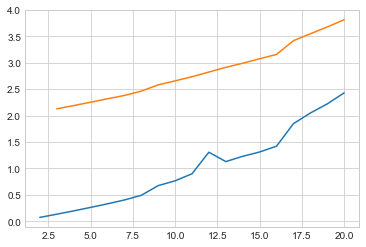

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

x = list(range(2,21))

ax.plot(x, TIMES_NODROP[:19])
ax.plot(x[1:], TIMES_1DROP)

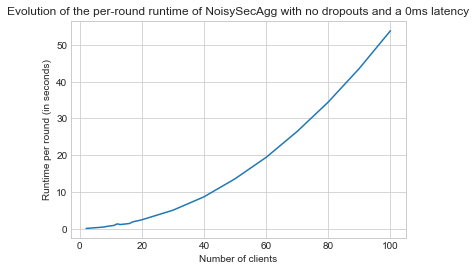

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

plt.title('Evolution of the per-round runtime of NoisySecAgg with no dropouts and a 0ms latency')
plt.xlabel('Number of clients')
plt.ylabel('Runtime per round (in seconds)')

x = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 40, 50, 60, 70, 80, 90, 100]
TIMES_NODROP = [0.07388674828314011, 0.1343496878941854, 0.19756906032562258, 0.2630871613820394, 0.3307826439539591, 0.4035215059916179, 0.49192493756612143, 0.6749291976292927, 0.7660953362782796, 0.8991318623224894, 1.30727596282959, 1.129831826686859, 1.2296751618385315, 1.311664879322052, 1.4210659265518188, 1.8476926922798158, 2.048360300064087, 2.221667492389679, 2.4300354599952696, 5.0346530914306635, 8.681818294525145, 13.593776297569274, 19.419429874420167, 26.475403451919554, 34.46864809989929, 43.62159004211426, 53.84520149230957]
ax.plot(x, TIMES_NODROP)